# Final Project
## *Part 1: Cleaning and EDA*

**Final presentation using visualizations:** [Google Slides](https://docs.google.com/presentation/d/1JaHLBoHPI0M4-sxdP1hu3cpAG-g9-Bs2ZKfNB9xjACk/edit?usp=sharing)

***
***

### A. Data Collection

#### Libraries

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(font_scale = 1.5)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

#### Dataset

**Video Game Sales with Ratings**   
Source: Kaggle https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
  
  
Contents:
- Name, Platform, YearofRelease, Genre, Publisher 
- NASales, EUSales, JPSales, OtherSales, Global_Sales: in millions of units
- Critic_score: Aggregate score compiled by Metacritic staff
- Criticcount: The number of critics used in coming up with the Criticscore
- User_score: Score by Metacritic's subscribers
- Usercount: Number of users who gave the userscore
- Developer: Party responsible for creating the game
- Rating: The ESRB ratings

In [102]:
file = 'vgsales_dec2016.csv'
vgsales = pd.read_csv(file)
vgsales.shape

(16719, 16)

In [103]:
vgsales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


***

### B. Data Preparation

#### Overview

In [104]:
vgsales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [105]:
vgsales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### Sales dataset

In [106]:
df = vgsales.copy()
df.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], 
              axis=1, inplace=True)

In [107]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


***

### C. Data Cleaning

#### Missing Values

In [108]:
# Check for missing values
df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [109]:
# Drop rows with missing values
df = df[pd.notnull(df['Year_of_Release'])]
df = df[pd.notnull(df['Name'])]
df = df[pd.notnull(df['Publisher'])]
# Reset the index and check again
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [110]:
# Correct games where the release year is incorrect 
df.at[1326, 'Year_of_Release'] = 1990 #Disney's DuckTales
df.at[2052, 'Year_of_Release'] = 2001 #NFL Fever 2002
df.at[12081, 'Year_of_Release'] = 2001 #ESPN Winter X-Games
df.at[5839, 'Year_of_Release'] = 2009 #Imagine: Makeup Artist
df.at[13842, 'Year_of_Release'] = 2016 #Phantasy Star Online, PS4
df.at[15932, 'Year_of_Release'] = 2013 #Phantasy Star Online, PSV
df.at[16087, 'Year_of_Release'] = 2016 #Brothers Conflict: Precious Baby

#### Platform

In [111]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [112]:
# Create columns for year launched, year discontinued and lifespan  
df['Platform_Launch_Year'] = df['Platform'] 
df['Platform_Death'] = df['Platform']
df['Platform_Lifespan'] = df['Platform'] 
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Platform_Launch_Year', 'Platform_Death', 'Platform_Lifespan'],
      dtype='object')

In [113]:
# Research and add values for Launch Year, Death year (if discontinued) and Lifespan for each platform

    # Nintendo:
#NES = Nintendo Entertainment System: 1983-1995 
df['Platform_Launch_Year'] = np.where((df.Platform == 'NES'),1983,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'NES'),1995-1983,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'NES'),1995,df.Platform_Death)
#SNES = Super Nintendo Entertainment System: 1990-2003
df['Platform_Launch_Year'] = np.where((df.Platform == 'SNES'),1990,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'SNES'),2003-1990,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'SNES'),2003,df.Platform_Death)
#N64 = Nintendo 64: 1996-2002
df['Platform_Launch_Year'] = np.where((df.Platform == 'N64'),1996,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'N64'),2002-1996,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'N64'),2002,df.Platform_Death)
#GC = GameCube: 2001-2007
df['Platform_Launch_Year'] = np.where((df.Platform == 'GC'),2001,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'GC'),2007-2001,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'GC'),2007,df.Platform_Death)
#GB = Gameboy: 1989-2003
df['Platform_Launch_Year'] = np.where((df.Platform == 'GB'),1989,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'GB'),2003-1989,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'GB'),2003,df.Platform_Death)
#GBA = GameBoy Advance: 2001-2010
df['Platform_Launch_Year'] = np.where((df.Platform == 'GBA'),2001,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'GBA'),2010-2001,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'GBA'),2010,df.Platform_Death)
#Wii: 2006-2017
df['Platform_Launch_Year'] = np.where((df.Platform == 'Wii'),2006,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'Wii'),2016-2006,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'Wii'),2016,df.Platform_Death)
#WiiU: 2012-2017
df['Platform_Launch_Year'] = np.where((df.Platform == 'WiiU'),2012,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'WiiU'),2016-2012,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'WiiU'),2016,df.Platform_Death)
#DS = Nintendo DS: 2004-2013
df['Platform_Launch_Year'] = np.where((df.Platform == 'DS'),2004,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'DS'),2013-2004,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'DS'),2013,df.Platform_Death)
#3DS: 2011-present
df['Platform_Launch_Year'] = np.where((df.Platform == '3DS'),2011,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == '3DS'),2016-2011,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == '3DS'),2016,df.Platform_Death)

    # XBox:
#XB = Xbox: 2001-2009
df['Platform_Launch_Year'] = np.where((df.Platform == 'XB'),2001,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'XB'),2009-2001,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'XB'),2009,df.Platform_Death)
#X360 = Xbox360: 2005-2016
df['Platform_Launch_Year'] = np.where((df.Platform == 'X360'),2005,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'X360'),2016-2005,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'X360'),2016,df.Platform_Death)
#XOne = Xbox One: 2013-2016
df['Platform_Launch_Year'] = np.where((df.Platform == 'XOne'),2013,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'XOne'),2016-2013,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'XOne'),2016,df.Platform_Death)


    # PlayStation:
#PS = PlayStation One: 1994-2000
df['Platform_Launch_Year'] = np.where((df.Platform == 'PS'),1994,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PS'),2000-1994,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PS'),2000,df.Platform_Death)
#PS2 = PlayStation 2: 2000-2013
df['Platform_Launch_Year'] = np.where((df.Platform == 'PS2'),2000,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PS2'),2013-2000,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PS2'),2013,df.Platform_Death)
#PS3 = PlayStation 3: 2006-2017
df['Platform_Launch_Year'] = np.where((df.Platform == 'PS3'),2006,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PS3'),2016-2006,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PS3'),2016,df.Platform_Death)
#PS4 = PlayStation 4: 2013-present
df['Platform_Launch_Year'] = np.where((df.Platform == 'PS4'),2013,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PS4'),2016-2013,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PS4'),2016,df.Platform_Death)
#PSP = PlayStation Portable: 2004-2014
df['Platform_Launch_Year'] = np.where((df.Platform == 'PSP'),2004,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PSP'),2014-2004,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PSP'),2014,df.Platform_Death)
#PSV = PlayStation Vita: 2011-2019
df['Platform_Launch_Year'] = np.where((df.Platform == 'PSV'),2011,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PSV'),2016-2011,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PSV'),2016,df.Platform_Death)

    # Sega
#GEN = Sega Genesis: 1988-1997  
df['Platform_Launch_Year'] = np.where((df.Platform == 'GEN'),1988,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'GEN'),1997-1988,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'GEN'),1997,df.Platform_Death)
#DC = Sega Dreamcast: 1998-2001
df['Platform_Launch_Year'] = np.where((df.Platform == 'DC'),1998,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'DC'),2001-1998,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'DC'),2001,df.Platform_Death)
#SAT = Sega Saturn: 1994-2000
df['Platform_Launch_Year'] = np.where((df.Platform == 'SAT'),1994,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'SAT'),2000-1994,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'SAT'),2000,df.Platform_Death)
#SCD = Sega CD: 1991-1996 
df['Platform_Launch_Year'] = np.where((df.Platform == 'SCD'),1991,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'SCD'),1996-1991,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'SCD'),1996,df.Platform_Death)
#GG = Sega Game Gear: 1990-1997
df['Platform_Launch_Year'] = np.where((df.Platform == 'GG'),1990,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'GG'),1997-1990,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'GG'),1997,df.Platform_Death)

    # Other
#2600 = Atari 2600: 1977-1992
df['Platform_Launch_Year'] = np.where((df.Platform == '2600'),1977,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == '2600'),1992-1977,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == '2600'),1992,df.Platform_Death)
#WS = WonderSwan: 1999-2003
df['Platform_Launch_Year'] = np.where((df.Platform == 'WS'),1999,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'WS'),2003-1999,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'WS'),2003,df.Platform_Death)
#NG = Neo Geo: 1991-1997
df['Platform_Launch_Year'] = np.where((df.Platform == 'NG'),1991,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'NG'),1997-1991,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'NG'),1997,df.Platform_Death)
#TG16 = TurboGrafx-16: 1987-1994
df['Platform_Launch_Year'] = np.where((df.Platform == 'TG16'),1987,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'TG16'),1994-1987,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'TG16'),1994,df.Platform_Death)
#3DO = 3DO Interactive Multiplayer: 1993-1996
df['Platform_Launch_Year'] = np.where((df.Platform == '3DO'),1993,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == '3DO'),1996-1993,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == '3DO'),1996,df.Platform_Death)
#PCFX: 1994-1998
df['Platform_Launch_Year'] = np.where((df.Platform == 'PCFX'),1994,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PCFX'),1998-1994,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PCFX'),1998,df.Platform_Death)
#PC = Personal Computers: 1977-present
df['Platform_Launch_Year'] = np.where((df.Platform == 'PC'),1977,df.Platform_Launch_Year)
df['Platform_Lifespan'] = np.where((df.Platform == 'PC'),2016-1977,df.Platform_Lifespan)
df['Platform_Death'] = np.where((df.Platform == 'PC'),2016,df.Platform_Death)

In [114]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Platform_Launch_Year', 'Platform_Death', 'Platform_Lifespan'],
      dtype='object')

#### Game

In [115]:
# Calculate each game's age, compare to Platform discontinuation

In [116]:
#how old is the game
df['Game_Age'] = 2016 - df['Year_of_Release']
#how old is the game compared to the platform
df['Game_released_xYears_after_Platform'] = df['Year_of_Release'] - df['Platform_Launch_Year']
#how long has it been since the platform, and therefore the game, was discuntinued? (0 if it hasn't)
df['Years_since_Platform_Discontinued'] = 2016 - df['Platform_Death']

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Platform_Launch_Year', 'Platform_Death', 'Platform_Lifespan',
       'Game_Age', 'Game_released_xYears_after_Platform',
       'Years_since_Platform_Discontinued'],
      dtype='object')

In [117]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Launch_Year,Platform_Death,Platform_Lifespan,Game_Age,Game_released_xYears_after_Platform,Years_since_Platform_Discontinued
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,2006,2016,10,10.0,0,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1983,1995,12,31.0,2,21
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,2006,2016,10,8.0,2,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,2006,2016,10,7.0,3,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1989,2003,14,20.0,7,13


#### dTypes

In [118]:
df.dtypes

Name                                    object
Platform                                object
Year_of_Release                        float64
Genre                                   object
Publisher                               object
NA_Sales                               float64
EU_Sales                               float64
JP_Sales                               float64
Other_Sales                            float64
Global_Sales                           float64
Platform_Launch_Year                    object
Platform_Death                          object
Platform_Lifespan                       object
Game_Age                               float64
Game_released_xYears_after_Platform     object
Years_since_Platform_Discontinued       object
dtype: object

In [119]:
# Change the incorrect types
df.Year_of_Release = df.Year_of_Release.astype(int) 
df.Platform_Launch_Year = df.Platform_Launch_Year.astype(int) 
df.Platform_Death = df.Platform_Death.astype(int)
df.Platform_Lifespan = df.Platform_Lifespan.astype(int) 
df.Game_Age = df.Game_Age.astype(int)
df.Game_released_xYears_after_Platform = df.Game_released_xYears_after_Platform.astype(int) 
df.Years_since_Platform_Discontinued = df.Years_since_Platform_Discontinued.astype(int)

In [120]:
df.dtypes

Name                                    object
Platform                                object
Year_of_Release                          int64
Genre                                   object
Publisher                               object
NA_Sales                               float64
EU_Sales                               float64
JP_Sales                               float64
Other_Sales                            float64
Global_Sales                           float64
Platform_Launch_Year                     int64
Platform_Death                           int64
Platform_Lifespan                        int64
Game_Age                                 int64
Game_released_xYears_after_Platform      int64
Years_since_Platform_Discontinued        int64
dtype: object

#### Publisher

In [121]:
df.Publisher.nunique()

579

In [122]:
df.Publisher.value_counts().head(30)

Electronic Arts                           1344
Activision                                 976
Namco Bandai Games                         935
Ubisoft                                    930
Konami Digital Entertainment               825
THQ                                        712
Nintendo                                   700
Sony Computer Entertainment                686
Sega                                       631
Take-Two Interactive                       421
Capcom                                     381
Atari                                      351
Tecmo Koei                                 348
Square Enix                                232
Warner Bros. Interactive Entertainment     220
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Entertainment                      184
D3Publisher  

In [123]:
toppublishers = ['Electronic Arts', 'Activision', 'Namco Bandai Games','Ubisoft','Konami Digital Entertainment',
                 'THQ','Nintendo','Sony Computer Entertainment','Sega','Take-Two Interactive','Capcom','Atari',
                 'Tecmo Koei','Square Enix','Warner Bros. Interactive Entertainment','Disney Interactive Studios',
                 'Eidos Interactive','Midway Games','505 Games','Microsoft Game Studios','Acclaim Entertainment',
                 'D3Publisher','Vivendi Games','Codemasters','Idea Factory','Deep Silver','Nippon Ichi Software',
                 'Zoo Digital Publishing']

In [124]:
df['Publisher'] = np.where((~df['Publisher'].isin(toppublishers)),'Other',df.Publisher)

In [125]:
df.Publisher.value_counts()

Other                                     4599
Electronic Arts                           1344
Activision                                 976
Namco Bandai Games                         935
Ubisoft                                    930
Konami Digital Entertainment               825
THQ                                        712
Nintendo                                   700
Sony Computer Entertainment                686
Sega                                       631
Take-Two Interactive                       421
Capcom                                     381
Atari                                      351
Tecmo Koei                                 348
Square Enix                                232
Warner Bros. Interactive Entertainment     220
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Enter

#### Descriptive Statistics

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16416.0,2006.489096,5.879188,1980.00,2003.00,2007.00,2010.00,2016.00
NA_Sales,16416.0,0.264129,0.819028,0.00,0.00,0.08,0.24,41.36
EU_Sales,16416.0,0.146034,0.507134,0.00,0.00,0.02,0.11,28.96
JP_Sales,16416.0,0.078623,0.311348,0.00,0.00,0.00,0.04,10.22
Other_Sales,16416.0,0.047670,0.188156,0.00,0.00,0.01,0.03,10.57
Global_Sales,16416.0,0.536708,1.559885,0.01,0.06,0.17,0.47,82.53
Platform_Launch_Year,16416.0,2001.081262,8.158182,1977.00,2000.00,2004.00,2006.00,2013.00
Platform_Death,16416.0,2011.879020,5.438448,1992.00,2010.00,2013.00,2016.00,2016.00
Platform_Lifespan,16416.0,10.797758,7.497509,3.00,8.00,10.00,11.00,39.00
Game_Age,16416.0,9.510904,5.879188,0.00,6.00,9.00,13.00,36.00


In [127]:
# The min for Game_released_xYears_after_Platform should be 0, 
#  some games are released the same year the platform is released, but not before
df[df['Game_released_xYears_after_Platform'] < 0]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Launch_Year,Platform_Death,Platform_Lifespan,Game_Age,Game_released_xYears_after_Platform,Years_since_Platform_Discontinued
15677,Strongest Tokyo University Shogi DS,DS,1985,Action,Other,0.0,0.0,0.02,0.0,0.02,2004,2013,9,31,-19,3


In [128]:
# Drop the game where I couldn't find the correct release year of
df.drop(df[df['Game_released_xYears_after_Platform'] < 0].index, inplace=True)

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16415.0,2006.490405,5.876974,1980.00,2003.00,2007.00,2010.00,2016.00
NA_Sales,16415.0,0.264145,0.819050,0.00,0.00,0.08,0.24,41.36
EU_Sales,16415.0,0.146043,0.507148,0.00,0.00,0.02,0.11,28.96
JP_Sales,16415.0,0.078626,0.311357,0.00,0.00,0.00,0.04,10.22
Other_Sales,16415.0,0.047673,0.188162,0.00,0.00,0.01,0.03,10.57
Global_Sales,16415.0,0.536740,1.559927,0.01,0.06,0.17,0.47,82.53
Platform_Launch_Year,16415.0,2001.081084,8.158399,1977.00,2000.00,2004.00,2006.00,2013.00
Platform_Death,16415.0,2011.878952,5.438606,1992.00,2010.00,2013.00,2016.00,2016.00
Platform_Lifespan,16415.0,10.797868,7.497724,3.00,8.00,10.00,11.00,39.00
Game_Age,16415.0,9.509595,5.876974,0.00,6.00,9.00,13.00,36.00


#### Final touches

In [130]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Platform_Launch_Year', 'Platform_Death', 'Platform_Lifespan',
       'Game_Age', 'Game_released_xYears_after_Platform',
       'Years_since_Platform_Discontinued'],
      dtype='object')

In [131]:
# Clean up the columns
df = df[['Name', 'Publisher', 'Year_of_Release', 'Game_Age', 'Genre', 
         'Platform', 'Platform_Launch_Year', 'Game_released_xYears_after_Platform', 'Platform_Death', 
         'Years_since_Platform_Discontinued', 'Platform_Lifespan',
         'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [132]:
df.head()

,Name,Publisher,Year_of_Release,Game_Age,Genre,Platform,Platform_Launch_Year,Game_released_xYears_after_Platform,Platform_Death,Years_since_Platform_Discontinued,Platform_Lifespan,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Nintendo,2006,10,Sports,Wii,2006,0,2016,0,10,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,Nintendo,1985,31,Platform,NES,1983,2,1995,21,12,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Nintendo,2008,8,Racing,Wii,2006,2,2016,0,10,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Nintendo,2009,7,Sports,Wii,2006,3,2016,0,10,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,Nintendo,1996,20,Role-Playing,GB,1989,7,2003,13,14,11.27,8.89,10.22,1.00,31.37


In [133]:
# Save dataframe
df.to_csv('vgsales2016_clean.csv') 

***

### D. EDA

#### Overlook af the dataset

In [134]:
df.columns

Index(['Name', 'Publisher', 'Year_of_Release', 'Game_Age', 'Genre', 'Platform',
       'Platform_Launch_Year', 'Game_released_xYears_after_Platform',
       'Platform_Death', 'Years_since_Platform_Discontinued',
       'Platform_Lifespan', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

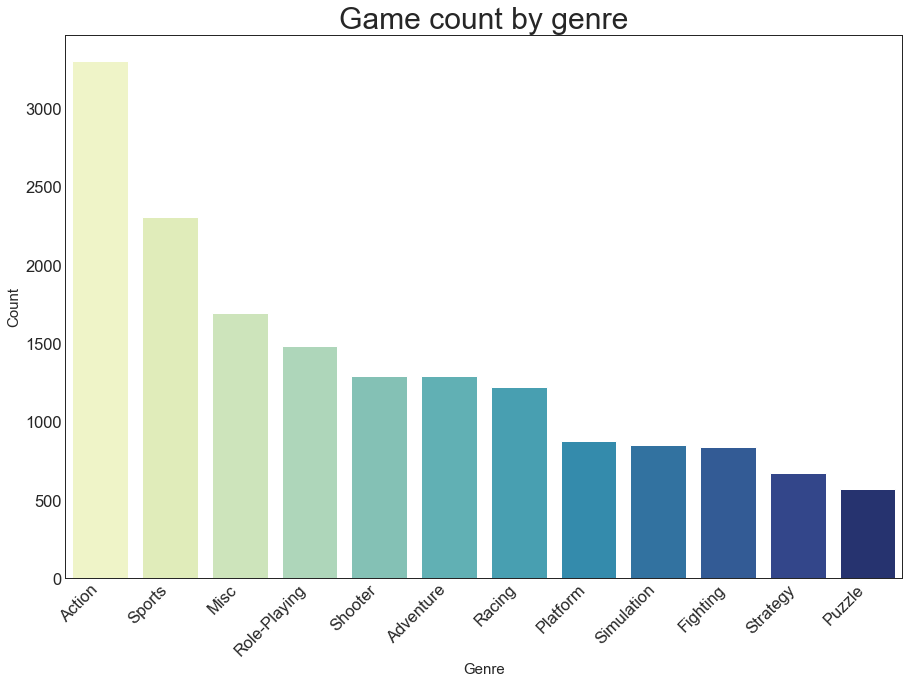

In [438]:
#Game count by genre
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=df.Genre.value_counts().index, y=df.Genre.value_counts(), 
                    palette="YlGnBu")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Genre", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Game count by genre", fontsize=30)

plt.savefig("gamecountbygenre",transparent=True)

plt.show(fig)

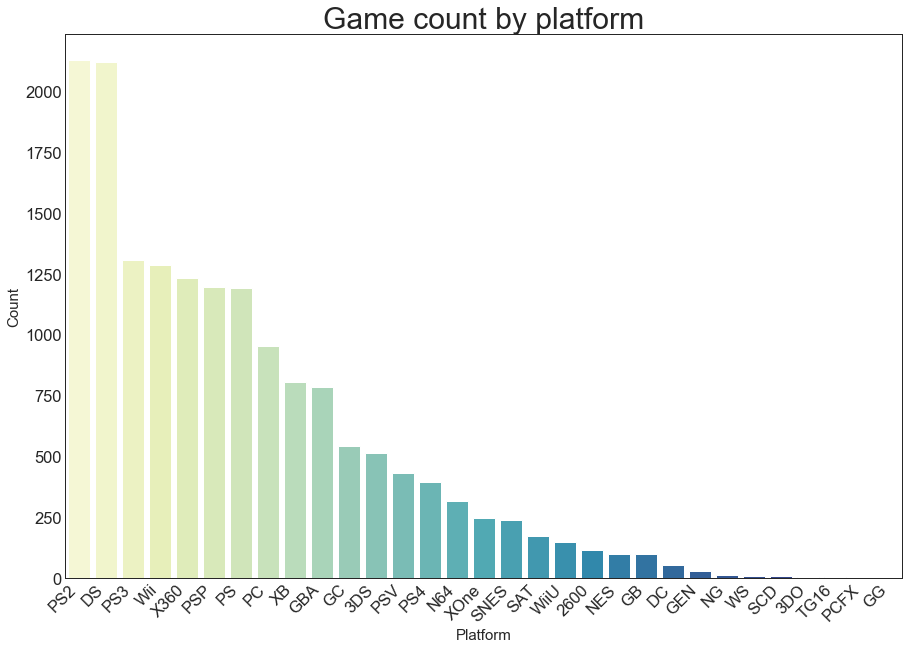

In [439]:
#Game count by Platform
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=df.Platform.value_counts().index, y=df.Platform.value_counts(), 
                    palette="YlGnBu") #GnBu_d

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Platform",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Game count by platform",fontsize=30)

plt.savefig("gamecountbyplatform",transparent=True)

plt.show(fig)

In [219]:
# Main publishers
publishers_sansOther = df.Publisher.value_counts().drop('Other')

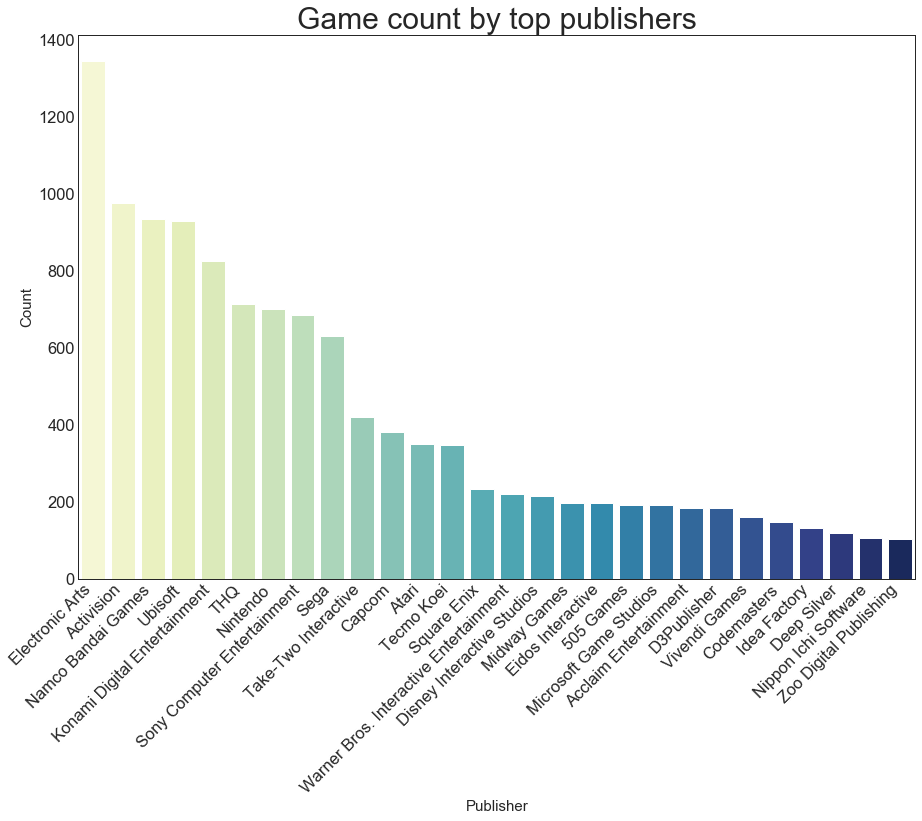

In [442]:
# Game count by Main Publisher 
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=publishers_sansOther.index, y=publishers_sansOther, palette="YlGnBu")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Publisher",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Game count by top publishers",fontsize=30)

plt.savefig("gamecountbypublisher",transparent=True)

plt.show(fig)

In [134]:
df.columns

Index(['Name', 'Publisher', 'Year_of_Release', 'Game_Age', 'Genre', 'Platform',
       'Platform_Launch_Year', 'Game_released_xYears_after_Platform',
       'Platform_Death', 'Years_since_Platform_Discontinued',
       'Platform_Lifespan', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

***

**Global Sales by Genre**

<function matplotlib.pyplot.show(*args, **kw)>

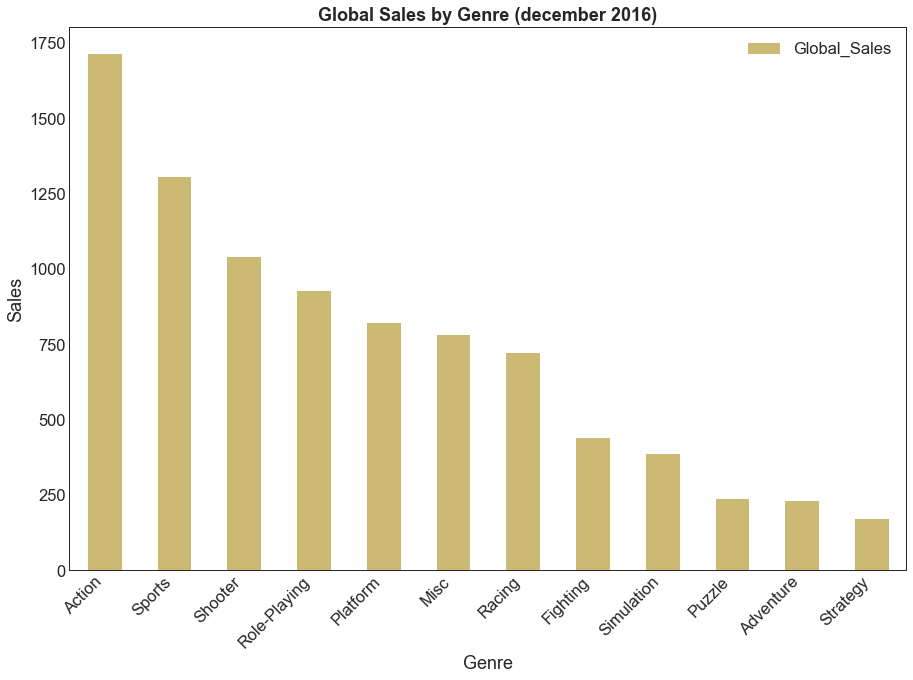

In [443]:
global_sales_by_genre = df[['Global_Sales', 'Genre']].groupby('Genre').sum()
global_sales_by_genre = global_sales_by_genre.sort_values('Global_Sales', ascending=False)

chart = global_sales_by_genre.plot(kind='bar',figsize=(15, 10), color='C8')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Genre")
plt.ylabel("Sales")
plt.title("Global Sales by Genre (december 2016)", weight='bold')

plt.savefig("globalsalesbygenre",transparent=True)

plt.show

**North America, Europe and Japan Sales by Genre**

<function matplotlib.pyplot.show(*args, **kw)>

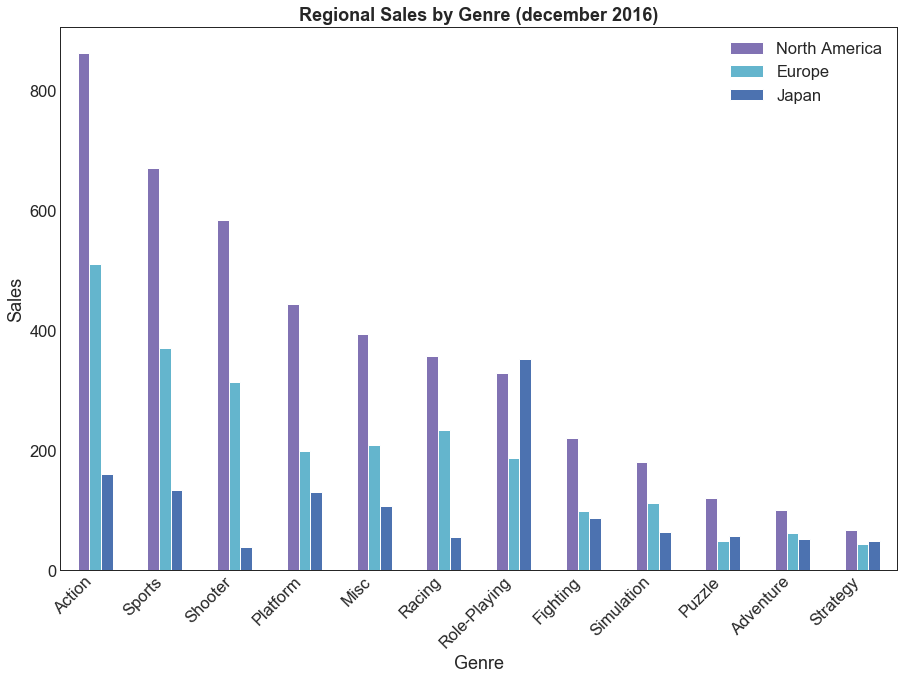

In [448]:
countrysales_by_genre = df[['NA_Sales','EU_Sales','JP_Sales', 'Genre']].groupby('Genre').sum()
countrysales_by_genre = countrysales_by_genre.sort_values('NA_Sales', ascending=False)

chart = countrysales_by_genre.plot(kind='bar',figsize=(15, 10), color=('C4','C9','C0'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(['North America', 'Europe', 'Japan'])
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.title("Regional Sales by Genre (december 2016)", weight='bold')

plt.savefig("regionalsalesbygenre",transparent=True)

plt.show

***

**Global Sales by Platform**

<function matplotlib.pyplot.show(*args, **kw)>

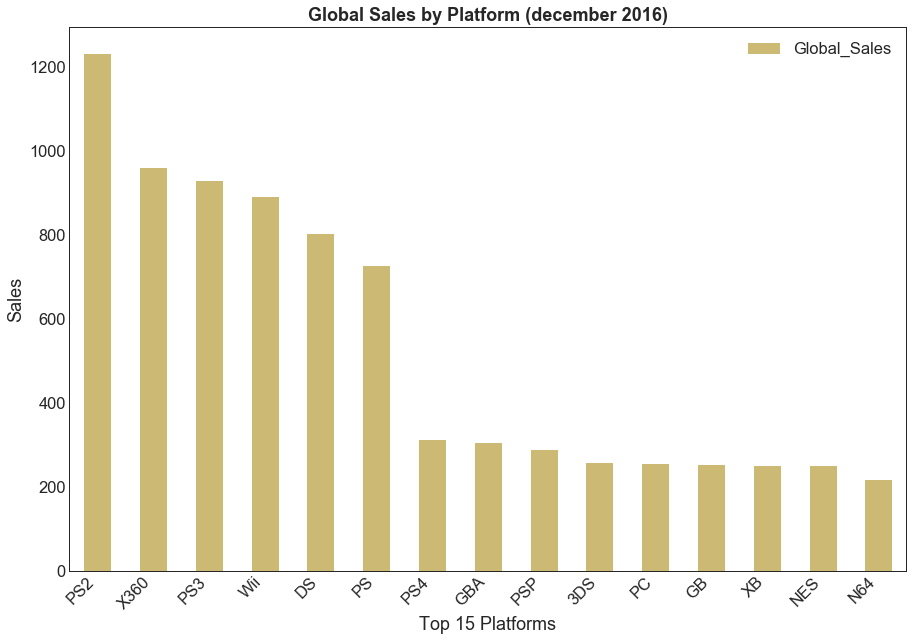

In [446]:
global_sales_by_platform = df[['Global_Sales', 'Platform']].groupby('Platform').sum()
global_sales_by_platform = global_sales_by_platform.sort_values('Global_Sales', ascending=False)

chart = global_sales_by_platform.head(15).plot(kind='bar',figsize=(15, 10), color='C8')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Top 15 Platforms")
plt.ylabel("Sales")
plt.title("Global Sales by Platform (december 2016)", weight='bold')

plt.savefig("globalsalesbyplatform",transparent=True)

plt.show

**North America, Europe and Japan Sales by Platform**

<function matplotlib.pyplot.show(*args, **kw)>

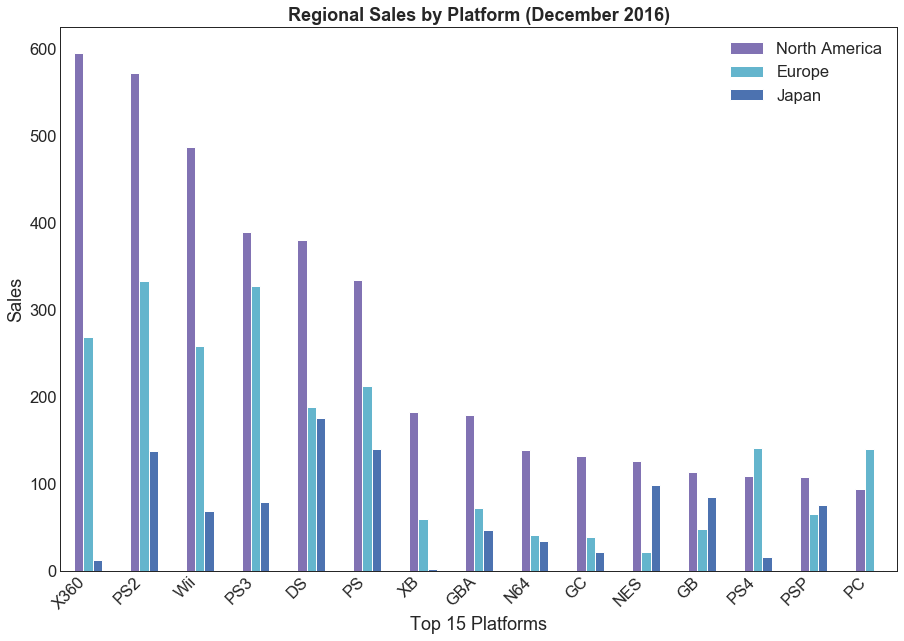

In [447]:
countrysales_by_platform = df[['NA_Sales','EU_Sales','JP_Sales', 'Platform']].groupby('Platform').sum()
countrysales_by_platform = countrysales_by_platform.sort_values('NA_Sales', ascending=False)
countrysales_by_platform = countrysales_by_platform.head(15)

chart = countrysales_by_platform.plot(kind='bar',figsize=(15, 10), color=('C4','C9','C0'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(['North America', 'Europe', 'Japan'])
plt.xlabel("Top 15 Platforms")
plt.ylabel("Sales")
plt.title("Regional Sales by Platform (December 2016)", weight='bold')

plt.savefig("regionalsalesbyplatform",transparent=True)

plt.show

***

In [359]:
df.columns

Index(['Name', 'Publisher', 'Year_of_Release', 'Game_Age', 'Genre', 'Platform',
       'Platform_Launch_Year', 'Game_released_xYears_after_Platform',
       'Platform_Death', 'Years_since_Platform_Discontinued',
       'Platform_Lifespan', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

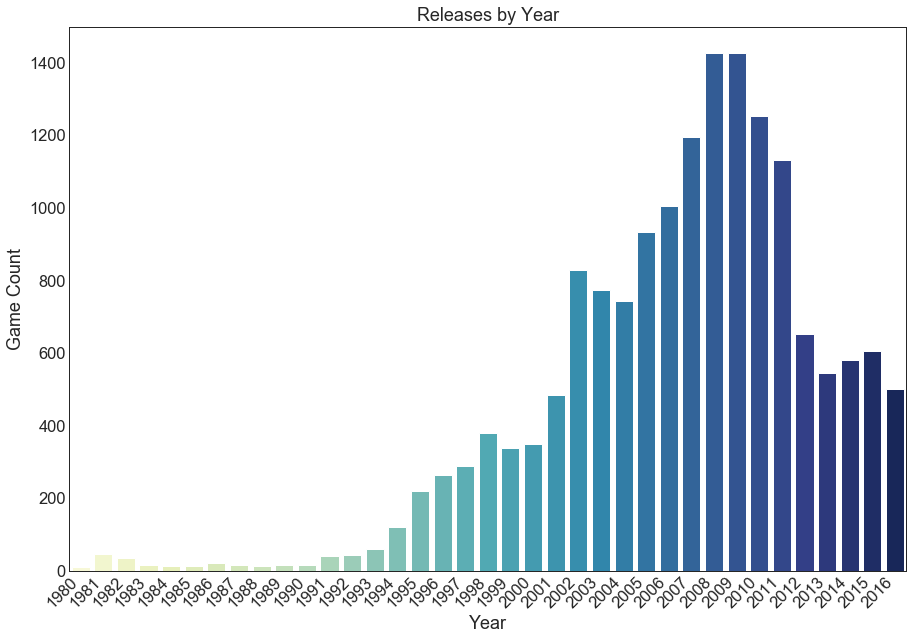

In [449]:
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=df.Year_of_Release.value_counts().index, y=df.Year_of_Release.value_counts(),
                    palette="YlGnBu") #GnBu_d

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Year")
plt.ylabel("Game Count")
plt.title("Releases by Year")

plt.savefig("releasesbyyear",transparent=True)

plt.show(fig)

In [376]:
df['Global_Sales'].describe()

count    16415.000000
mean         0.536740
std          1.559927
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

In [401]:
# Games with highest sales
topgames_globalsales = df[df['Global_Sales'] > 0.8]

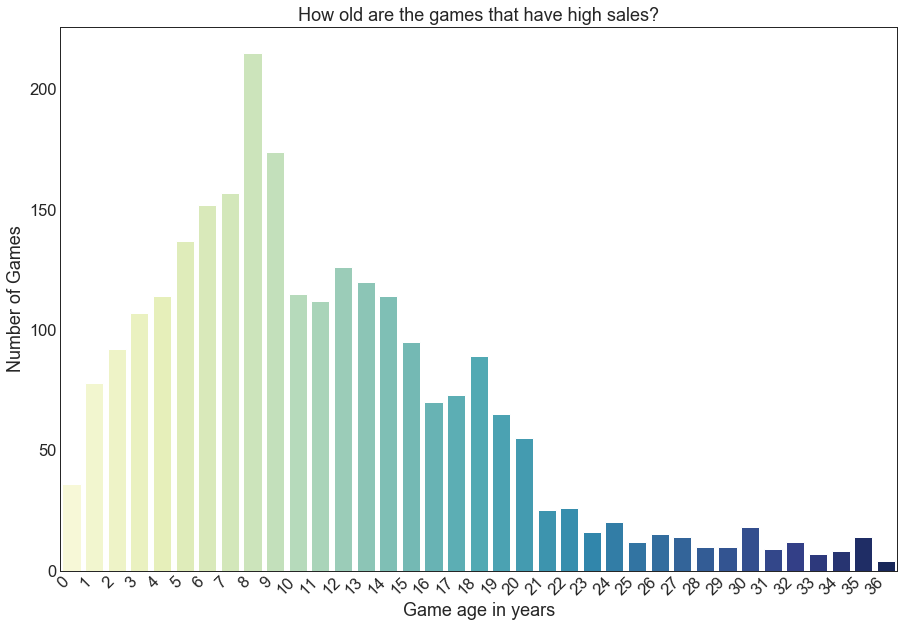

In [463]:
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=topgames_globalsales.Game_Age.value_counts().index, 
                    y=topgames_globalsales.Game_Age.value_counts(),
                    palette="YlGnBu") #GnBu_d

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Game age in years")
plt.ylabel("Number of Games")
plt.title("How old are the games that have high sales?")

plt.savefig("agesofgameswithtopsales",transparent=True)

plt.show(fig)

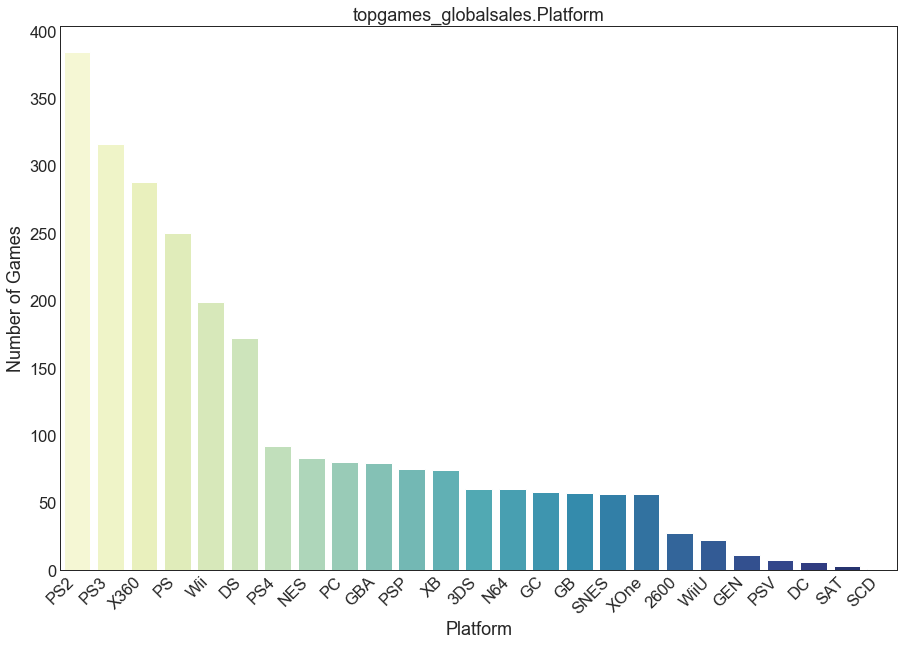

In [469]:
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=topgames_globalsales.Platform.value_counts().index, 
                    y=topgames_globalsales.Platform.value_counts(),
                    palette="YlGnBu") #GnBu_d

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.title("topgames_globalsales.Platform")

#plt.savefig("gamevsplatformrelease",transparent=True)

plt.show(fig)

<function matplotlib.pyplot.show(*args, **kw)>

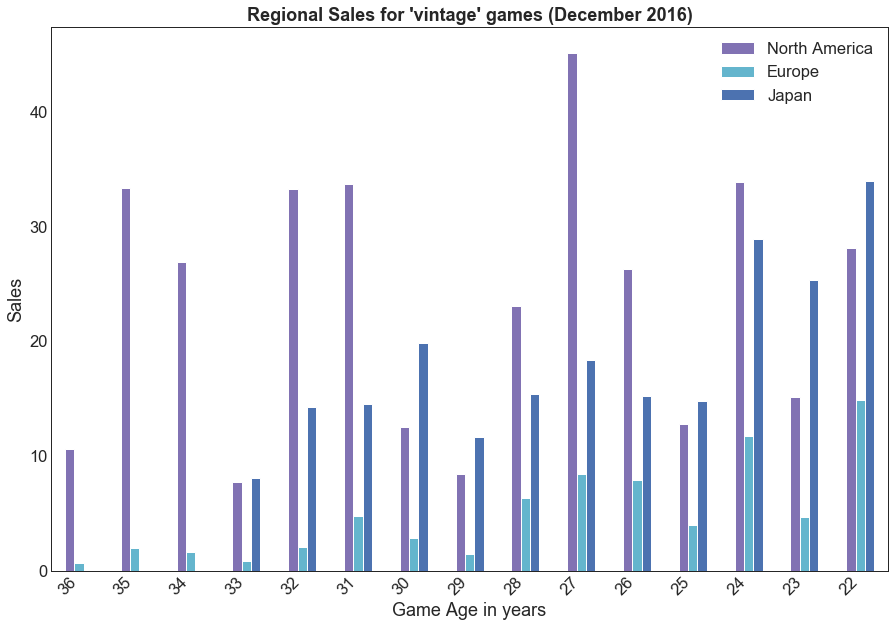

In [515]:
regional_sales = df[['NA_Sales','EU_Sales','JP_Sales', 'Game_Age']].groupby('Game_Age').sum()
regional_sales = regional_sales.sort_values('Game_Age', ascending=False)
regional_sales = regional_sales.head(15)

chart = regional_sales.plot(kind='bar',figsize=(15, 10), color=('C4','C9','C0'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(['North America', 'Europe', 'Japan'])
plt.xlabel("Game Age in years")
plt.ylabel("Sales")
plt.title("Regional Sales for 'vintage' games (December 2016)", weight='bold')

plt.savefig("regional_sales_vintagegames",transparent=True)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

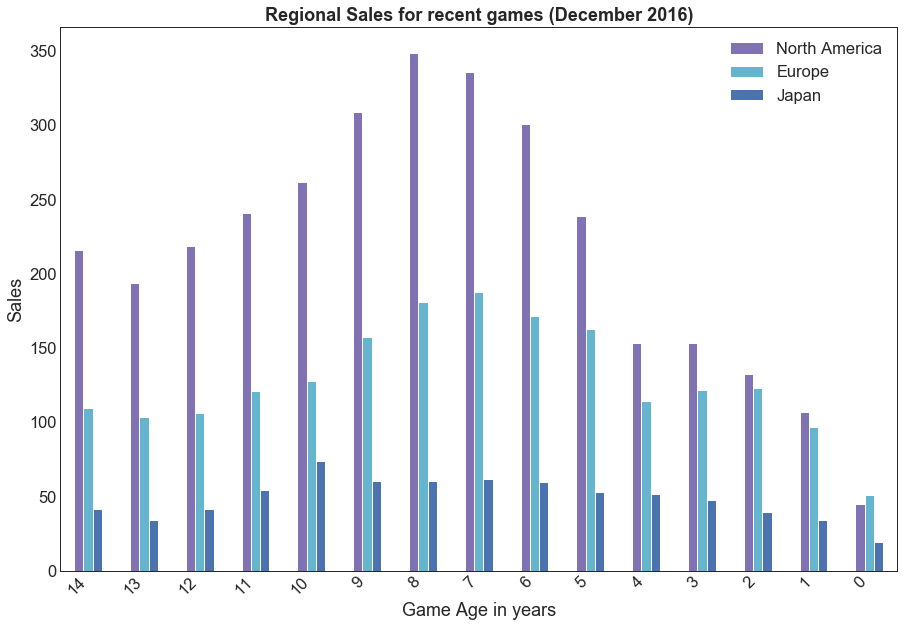

In [501]:
regional_sales = df[['NA_Sales','EU_Sales','JP_Sales', 'Game_Age']].groupby('Game_Age').sum()
regional_sales = regional_sales.sort_values('Game_Age', ascending=False)
regional_sales = regional_sales.tail(15)

chart = regional_sales.plot(kind='bar',figsize=(15, 10), color=('C4','C9','C0'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(['North America', 'Europe', 'Japan'])
plt.xlabel("Game Age in years")
plt.ylabel("Sales")
plt.title("Regional Sales for recent games (December 2016)", weight='bold')

plt.savefig("regional_sales_newgames",transparent=True)

plt.show

In [519]:
df.columns

Index(['Name', 'Publisher', 'Year_of_Release', 'Game_Age', 'Genre', 'Platform',
       'Platform_Launch_Year', 'Game_released_xYears_after_Platform',
       'Platform_Death', 'Years_since_Platform_Discontinued',
       'Platform_Lifespan', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [521]:
eight_yo_games = df[df['Game_Age'] == 8]

In [526]:
eight_yo_games.head(10).Name

2                                Mario Kart Wii
39                      Super Smash Bros. Brawl
51                          Grand Theft Auto IV
57                          Grand Theft Auto IV
90                     Pokémon Platinum Version
100                  Call of Duty: World at War
117                              Gears of War 2
147    Metal Gear Solid 4: Guns of the Patriots
150                             LittleBigPlanet
163                Monster Hunter Freedom Unite
Name: Name, dtype: object

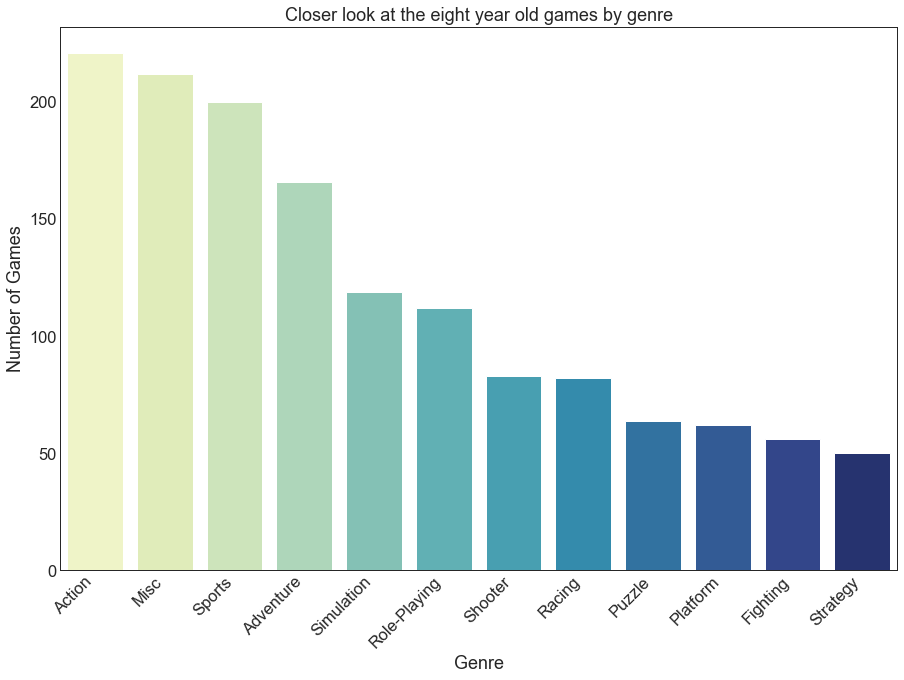

In [548]:
fig, ax = plt.subplots(figsize=(15, 10))
chart = sns.barplot(x=eight_yo_games.Genre.value_counts().index,
                    y=eight_yo_games.Genre.value_counts(),
                    palette="YlGnBu") #GnBu_d

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Closer look at the eight year old games by genre")

plt.savefig("eight_yo_games_genres",transparent=True)

plt.show(fig)

In [564]:
#6086 games
classics = df[df['Game_Age'] > 10]

In [573]:
classics = classics[['Name','Global_Sales', 'Game_Age']].sort_values(by='Global_Sales', ascending=False)
classics.head(20)

,Name,Global_Sales,Game_Age
1,Super Mario Bros.,40.24,31
4,Pokemon Red/Pokemon Blue,31.37,20
5,Tetris,30.26,27
9,Duck Hunt,28.31,32
10,Nintendogs,24.67,11
11,Mario Kart DS,23.21,11
12,Pokemon Gold/Pokemon Silver,23.10,17
17,Grand Theft Auto: San Andreas,20.81,12
18,Super Mario World,20.61,26
19,Brain Age: Train Your Brain in Minutes a Day,20.15,11


In [577]:
#1108 games, released in the last 2 years
newgames = df[df['Game_Age'] < 2]

In [578]:
newgames = newgames[['Name','Global_Sales', 'Game_Age']].sort_values(by='Global_Sales', ascending=False)
newgames.head(20)

,Name,Global_Sales,Game_Age
31,Call of Duty: Black Ops 3,14.63,1
77,FIFA 16,8.57,1
87,Star Wars Battlefront (2015),7.98,1
94,FIFA 17,7.59,0
99,Call of Duty: Black Ops 3,7.39,1
105,Fallout 4,7.16,1
108,Pokemon Sun/Moon,7.14,0
171,Uncharted 4: A Thief's End,5.38,0
230,Uncharted: The Nathan Drake Collection,4.62,1
241,Halo 5: Guardians,4.48,1


***

***

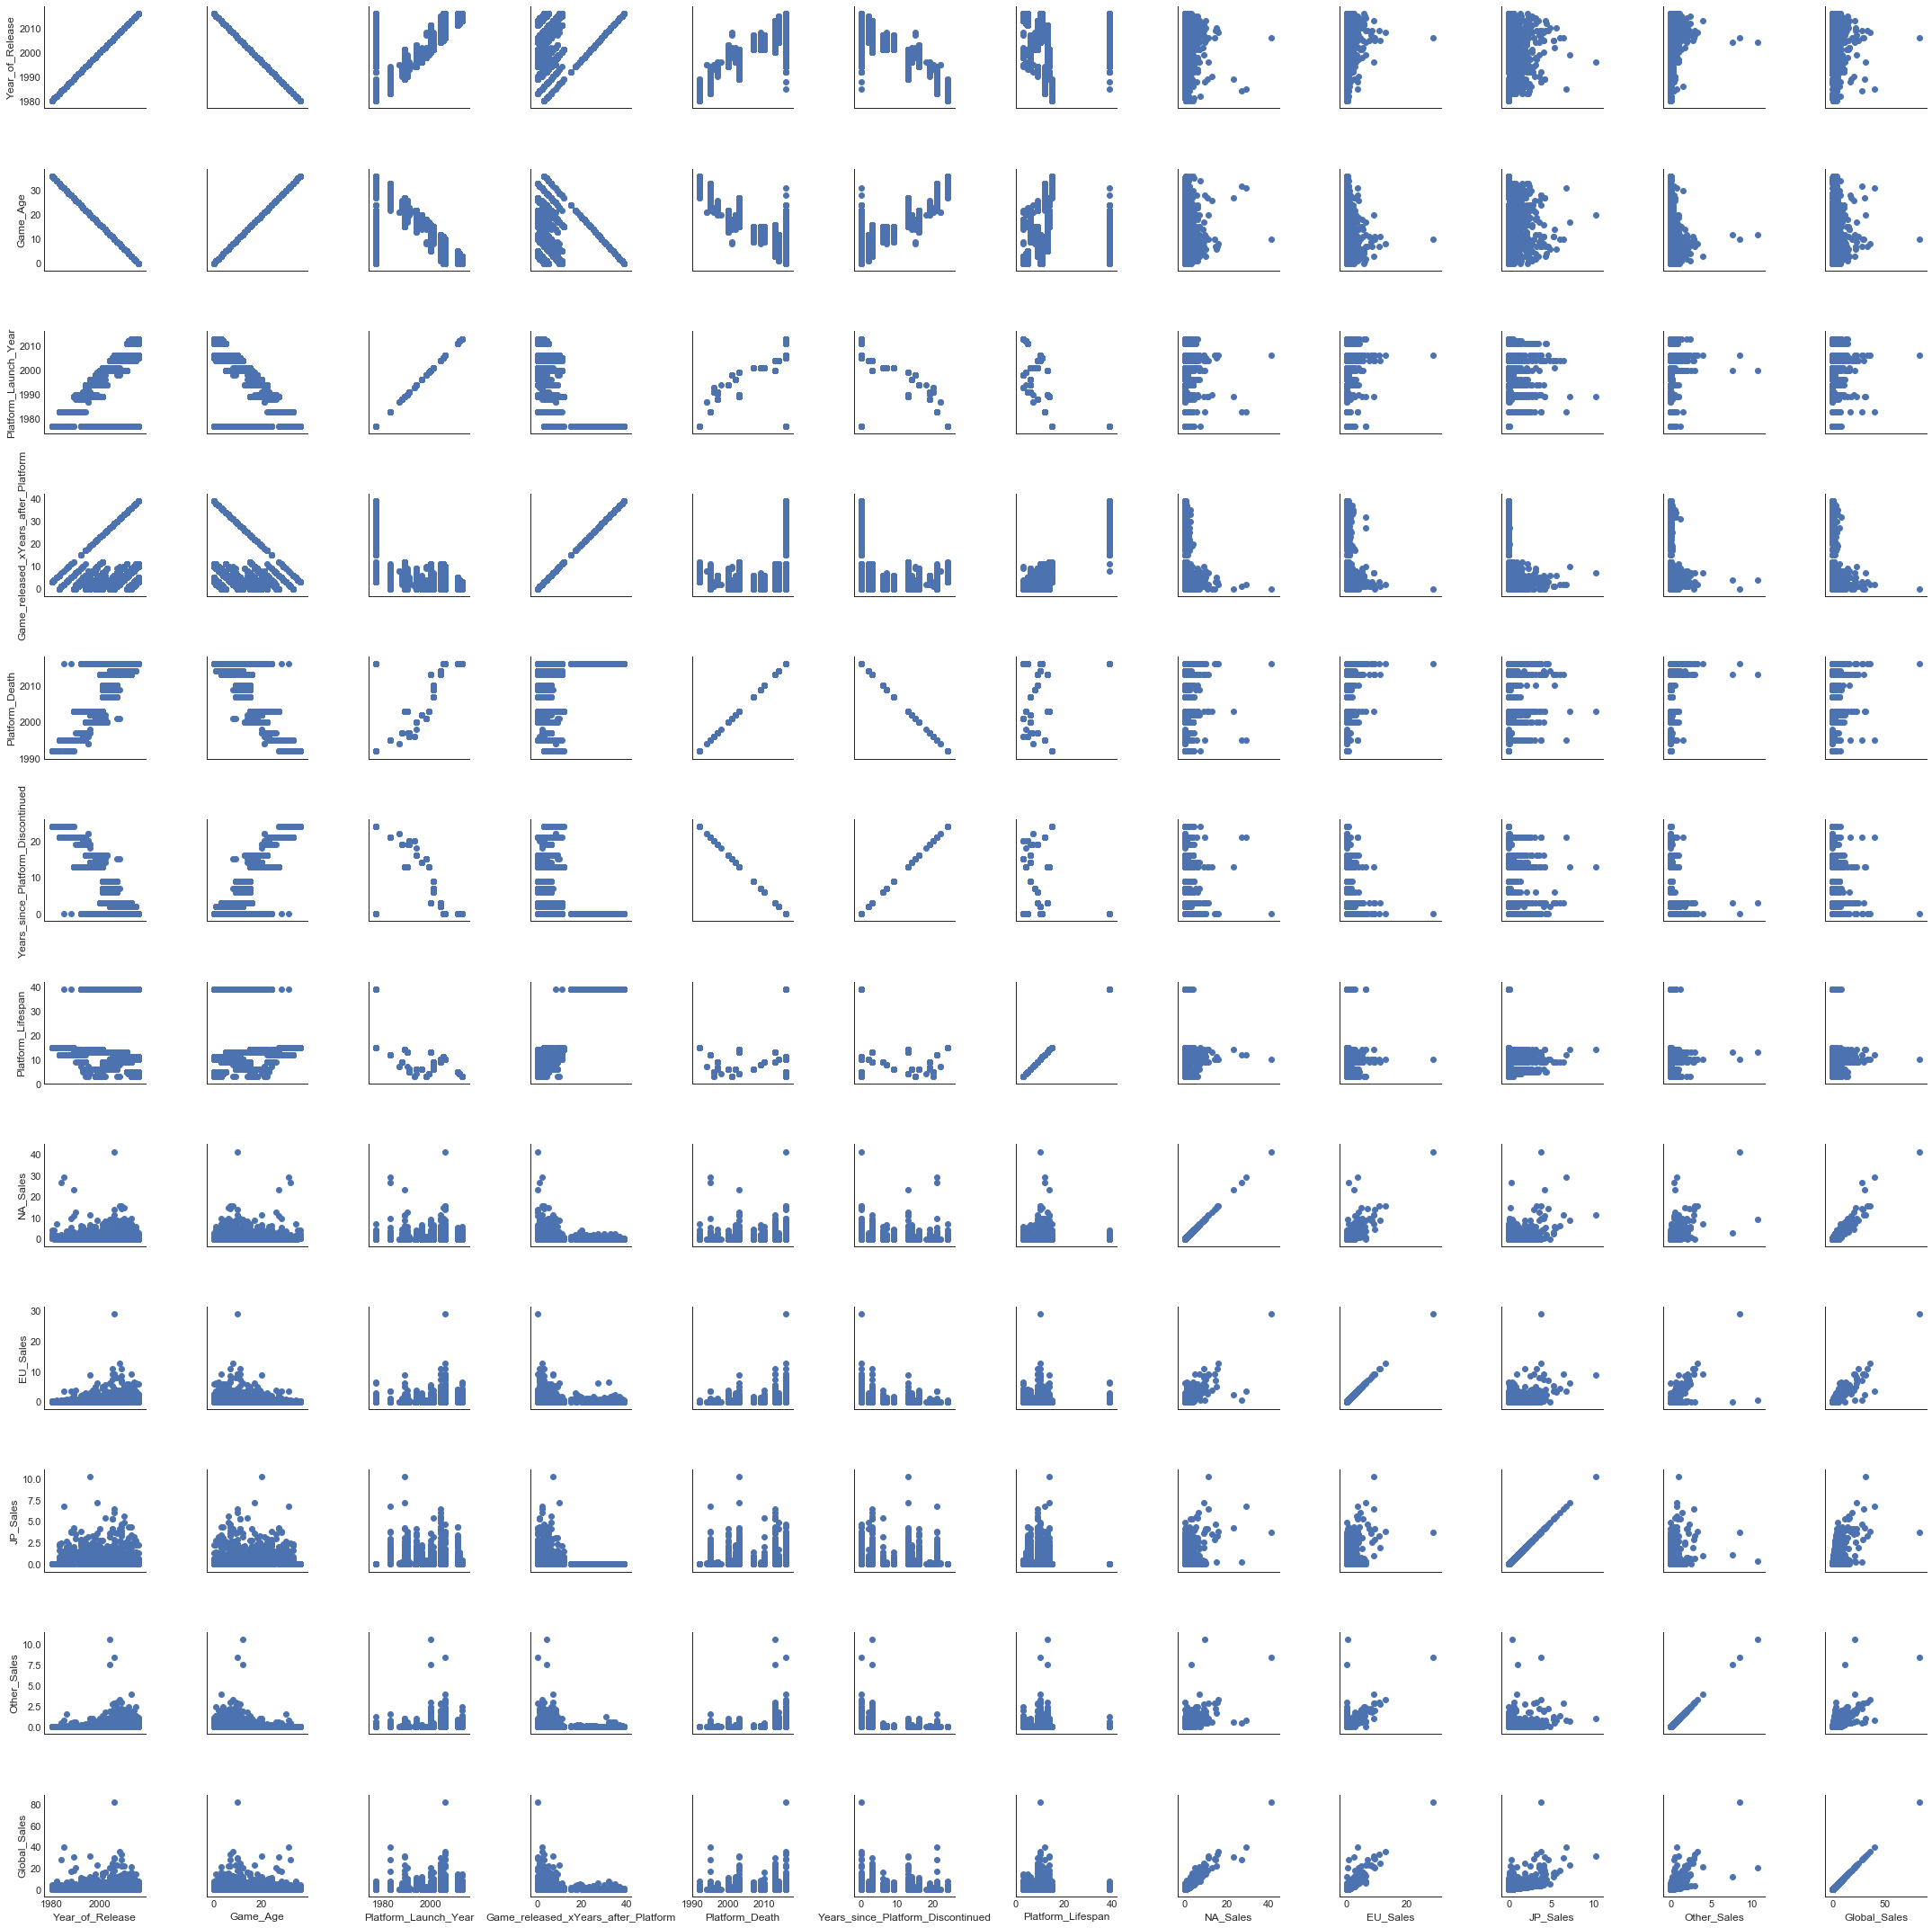

In [144]:
# Scatter plot
g=sns.PairGrid(df)
g=g.map(plt.scatter)

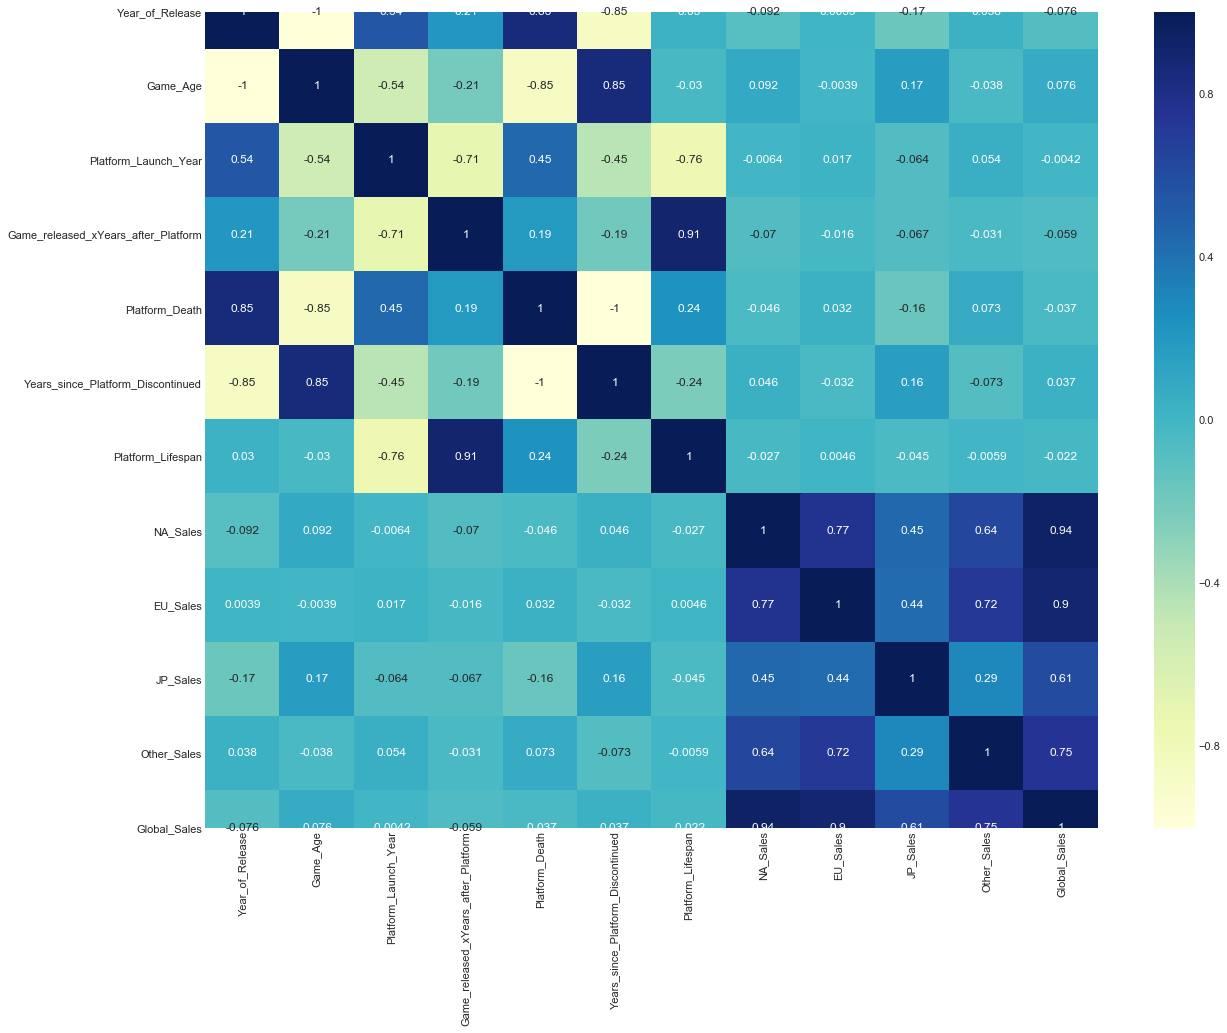

In [140]:
# Create correlation Matrix using numeric columns
corrMatrix = df.corr()

# Visualize columns with high collinearity with a heatmap
plt.figure(figsize = (20,15))
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.show()

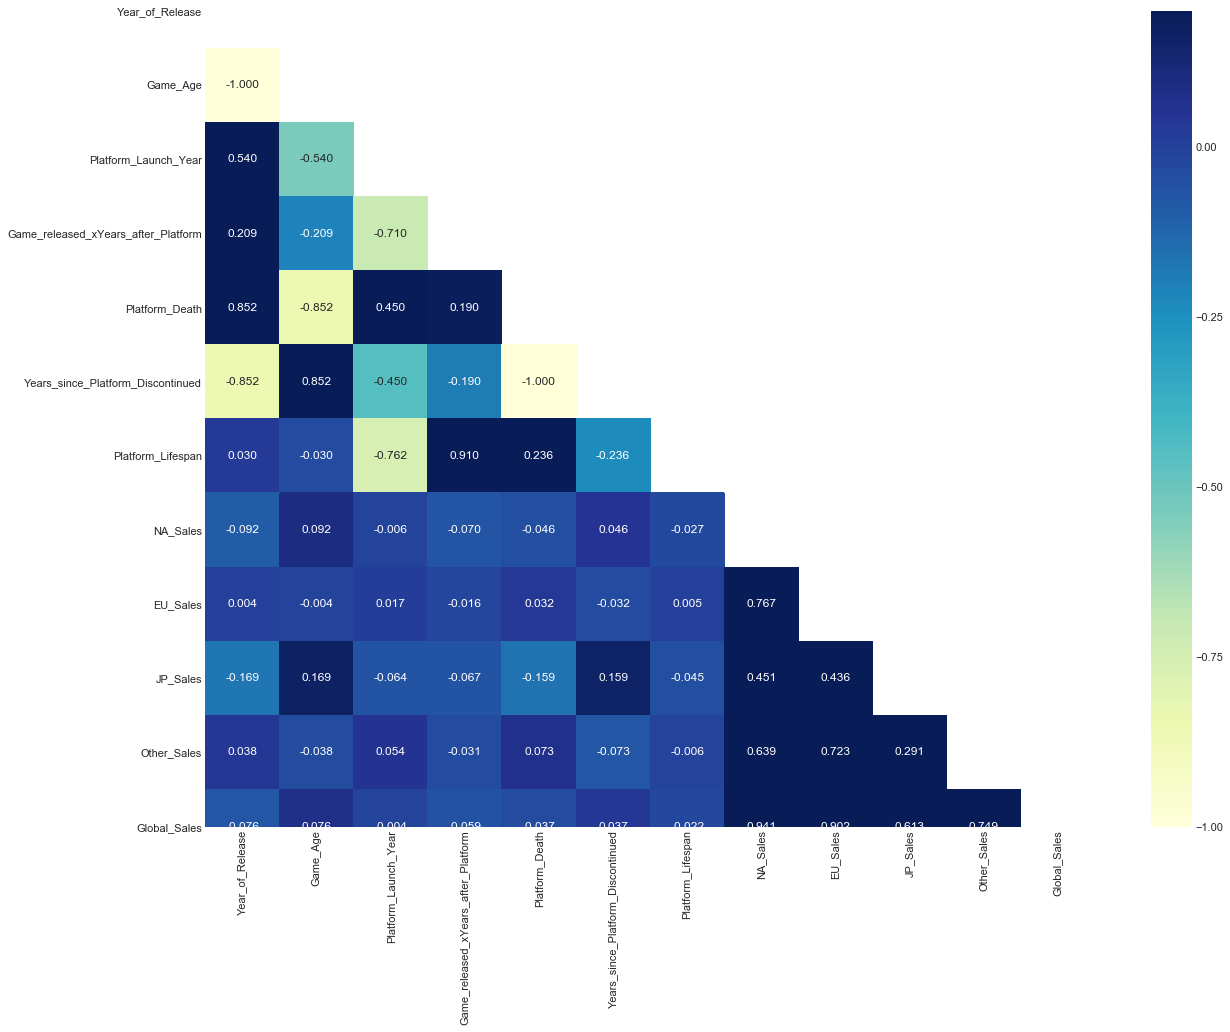

In [141]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize = (20,15))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap="YlGnBu")

***

In [156]:
df1 = df.copy()
df1.dtypes

Name                                    object
Publisher                               object
Year_of_Release                          int64
Game_Age                                 int64
Genre                                   object
Platform                                object
Platform_Launch_Year                     int64
Game_released_xYears_after_Platform      int64
Platform_Death                           int64
Years_since_Platform_Discontinued        int64
Platform_Lifespan                        int64
NA_Sales                               float64
EU_Sales                               float64
JP_Sales                               float64
Other_Sales                            float64
Global_Sales                           float64
dtype: object

In [157]:
from sklearn import preprocessing

In [159]:
le = preprocessing.LabelEncoder()

le.fit(df1['Genre'])
df1['Genre'] = le.transform(df1['Genre'])

In [160]:
le.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [161]:
df1

,Name,Publisher,Year_of_Release,Game_Age,Genre,Platform,Platform_Launch_Year,Game_released_xYears_after_Platform,Platform_Death,Years_since_Platform_Discontinued,Platform_Lifespan,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Nintendo,2006,10,10,Wii,2006,0,2016,0,10,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,Nintendo,1985,31,4,NES,1983,2,1995,21,12,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Nintendo,2008,8,6,Wii,2006,2,2016,0,10,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Nintendo,2009,7,10,Wii,2006,3,2016,0,10,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,Nintendo,1996,20,7,GB,1989,7,2003,13,14,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16411,Samurai Warriors: Sanada Maru,Tecmo Koei,2016,0,0,PS3,2006,10,2016,0,10,0.00,0.00,0.01,0.00,0.01
16412,LMA Manager 2007,Codemasters,2006,10,10,X360,2005,1,2016,0,11,0.00,0.01,0.00,0.00,0.01
16413,Haitaka no Psychedelica,Idea Factory,2016,0,1,PSV,2011,5,2016,0,5,0.00,0.00,0.01,0.00,0.01
16414,Spirits & Spells,Other,2003,13,4,GBA,2001,2,2010,6,9,0.01,0.00,0.00,0.00,0.01


<Figure size 576x432 with 0 Axes>

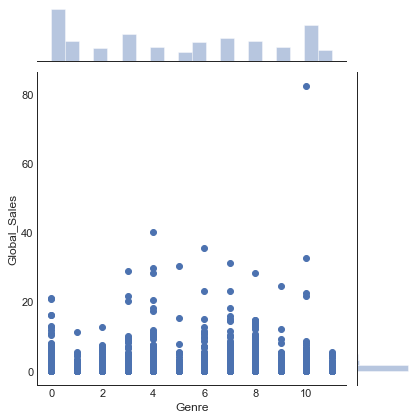

In [163]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Genre',y='Global_Sales', data=df1)